In [ ]:
import pandas as pd
pd.read_csv('dataset1.csv')

,Diseases,Codes,Count,Population,Rate,CI.lower,CI.upper
0,acute rhinitis or the common cold,J00,618,135956,454.557,419.495,491.761
1,acute pharyngitis,J02,408,399913,102.022,92.366,112.413
2,acute tonsillitis,J03,63,35987637,0.175,0.135,0.224
3,acute upper respiratory tract infection,J06,13,833361,1.560,0.831,2.668
4,acute bronchitis,J20,120,825061,14.544,12.059,17.391
5,allergic or vasomotor rhinitis,J30,13,4941613,0.263,0.140,0.450
6,Chronic sinusitis,J32,499,3017248,16.538,15.119,18.055


In [ ]:
import pandas as pd
csv_file1 = 'clean data.csv'
csv_file2 = 'dataset1.csv'

df1 = pd.read_csv(csv_file1)
df2 = pd.read_csv(csv_file2)
print("DataFrame 1:")
print(df1.head())

print("\nDataFrame 2:")
print(df2.head())

DataFrame 1:
        date   pm25   pm10    o3   no2  so2    co
0  2023-10-1  153.0  102.0  35.0  35.0  6.0  14.0
1  2023-10-2  149.0   96.0  34.0  25.0  5.0  13.0
2  2023-10-3  135.0   90.0  31.0  26.0  5.0  11.0
3  2023-10-4  120.0   84.0  30.0  27.0  4.0  10.0
4  2023-10-5  114.0   76.0  31.0  27.0  3.0  10.0

DataFrame 2:
                                  Diseases Codes  Count  Population     Rate  \
0        acute rhinitis or the common cold   J00    618      135956  454.557   
1                        acute pharyngitis   J02    408      399913  102.022   
2                        acute tonsillitis   J03     63    35987637    0.175   
3  acute upper respiratory tract infection   J06     13      833361    1.560   
4                         acute bronchitis   J20    120      825061   14.544   

   CI.lower  CI.upper  
0   419.495   491.761  
1    92.366   112.413  
2     0.135     0.224  
3     0.831     2.668  
4    12.059    17.391  


In [ ]:
combined_df = pd.concat([df1, df2], ignore_index=True)
print(combined_df)

           date   pm25   pm10    o3   no2  so2    co  \
0     2023-10-1  153.0  102.0  35.0  35.0  6.0  14.0   
1     2023-10-2  149.0   96.0  34.0  25.0  5.0  13.0   
2     2023-10-3  135.0   90.0  31.0  26.0  5.0  11.0   
3     2023-10-4  120.0   84.0  30.0  27.0  4.0  10.0   
4     2023-10-5  114.0   76.0  31.0  27.0  3.0  10.0   
...         ...    ...    ...   ...   ...  ...   ...   
1470        NaN    NaN    NaN   NaN   NaN  NaN   NaN   
1471        NaN    NaN    NaN   NaN   NaN  NaN   NaN   
1472        NaN    NaN    NaN   NaN   NaN  NaN   NaN   
1473        NaN    NaN    NaN   NaN   NaN  NaN   NaN   
1474        NaN    NaN    NaN   NaN   NaN  NaN   NaN   

                                     Diseases Codes  Count  Population  \
0                                         NaN   NaN    NaN         NaN   
1                                         NaN   NaN    NaN         NaN   
2                                         NaN   NaN    NaN         NaN   
3                              

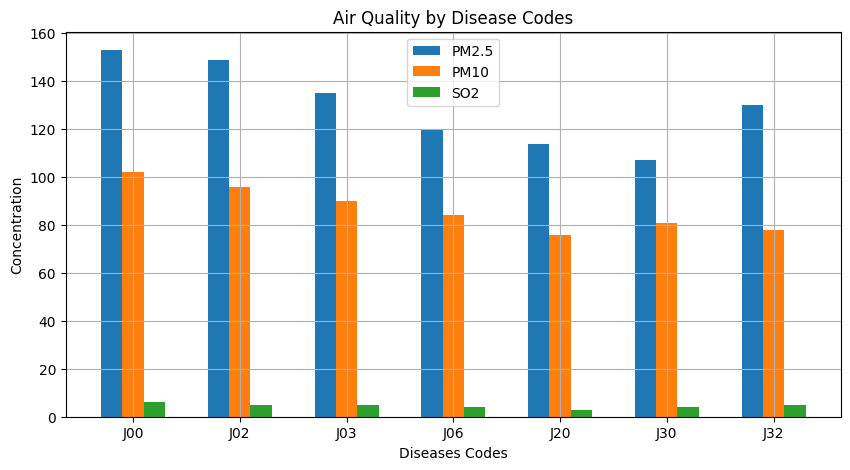

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Diseases Codes': ['J00', 'J02', 'J03', 'J06', 'J20', 'J30', 'J32'],
    'pm10': [102,96,90,84,76,81,78],
    'pm25': [153,149,135,120,114,107,130],
    'so2': [6,5,5,4,3,4,5],
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 5))
width = 0.2
x = range(len(df))
x_pm25 = [i - width for i in x]
x_pm10 = x
x_so2 = [i + width for i in x]

plt.bar(x_pm25, df['pm25'], width=width, label='PM2.5')
plt.bar(x_pm10, df['pm10'], width=width, label='PM10')
plt.bar(x_so2, df['so2'], width=width, label='SO2')
plt.xlabel('Diseases Codes')
plt.ylabel('Concentration')
plt.title('Air Quality by Disease Codes')
plt.xticks(x, df['Diseases Codes'])
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
pip install tensorflow


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np

# Load the first dataset
df1 = pd.read_csv('clean data.csv')

# Load the second dataset
df2 = pd.read_csv('dataset1.csv')

# Combine the datasets (replace 'your_target_column_name' with the actual target column name)
combined_df = pd.concat([df1, df2], ignore_index=True)

# Assuming 'pm10', 'pm25', and 'so2' are relevant columns
X = combined_df[['pm10', 'pm25', 'so2']]

# Choose the correct column name for the target variable (replace with your actual target column name)
y_column_name = 'pm25'
y = combined_df[y_column_name]

# Impute missing values in X using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Impute missing values in y using the mean strategy
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Feedforward Neural Network
feedforward_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
feedforward_model.fit(X_train, y_train)

# Decision Tree
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)


# Recurrent Neural Network
X_train_rnn = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train.shape[1])))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=0)

# Make Predictions
linear_predictions = linear_model.predict(X_test)
feedforward_predictions = feedforward_model.predict(X_test)
regressor_predictions = regressor.predict(X_test)
rnn_predictions = rnn_model.predict(X_test_rnn).flatten()

# Evaluate Models
linear_mse = mean_squared_error(y_test, linear_predictions)
feedforward_mse = mean_squared_error(y_test, feedforward_predictions)
regressor_mse = mean_squared_error(y_test, regressor_predictions)
rnn_mse = mean_squared_error(y_test, rnn_predictions)

print(f'Linear Regression MSE: {linear_mse}')
print(f'Feedforward Neural Network MSE: {feedforward_mse}')
print(f'Decision Tree Regressor MSE: {regressor_mse}')
print(f'Recurrent Neural Network MSE: {rnn_mse}')


10/10 [==============================] - 0s 2ms/step
Linear Regression MSE: 4.624604479351271e-25
Feedforward Neural Network MSE: 0.007122614955230152
Decision Tree Regressor MSE: 0.08813559322033898
Recurrent Neural Network MSE: 0.008692769909172626


10/10 [==============================] - 0s 1ms/step


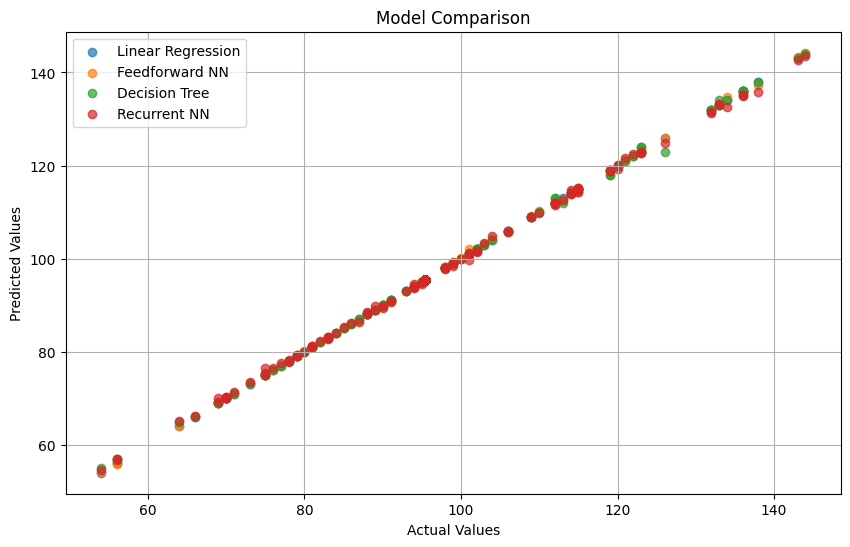

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np
import matplotlib.pyplot as plt

# Load the first dataset
df1 = pd.read_csv('clean data.csv')

# Load the second dataset
df2 = pd.read_csv('dataset1.csv')

# Combine the datasets (replace 'your_target_column_name' with the actual target column name)
combined_df = pd.concat([df1, df2], ignore_index=True)

# Assuming 'pm10', 'pm25', and 'so2' are relevant columns
X = combined_df[['pm10', 'pm25', 'so2']]

# Choose the correct column name for the target variable (replace with your actual target column name)
y_column_name = 'pm25'
y = combined_df[y_column_name]

# Impute missing values in X using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Impute missing values in y using the mean strategy
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Feedforward Neural Network
feedforward_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
feedforward_model.fit(X_train, y_train)

# Decision Tree
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Recurrent Neural Network
X_train_rnn = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train.shape[1])))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=0)

# Make Predictions
linear_predictions = linear_model.predict(X_test)
feedforward_predictions = feedforward_model.predict(X_test)
regressor_predictions = regressor.predict(X_test)
rnn_predictions = rnn_model.predict(X_test_rnn).flatten()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_predictions, label='Linear Regression', alpha=0.7)
plt.scatter(y_test, feedforward_predictions, label='Feedforward NN', alpha=0.7)
plt.scatter(y_test, regressor_predictions, label='Decision Tree', alpha=0.7)
plt.scatter(y_test, rnn_predictions, label='Recurrent NN', alpha=0.7)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Comparison')
plt.legend()
plt.grid(True)
plt.show()


10/10 [==============================] - 0s 1ms/step


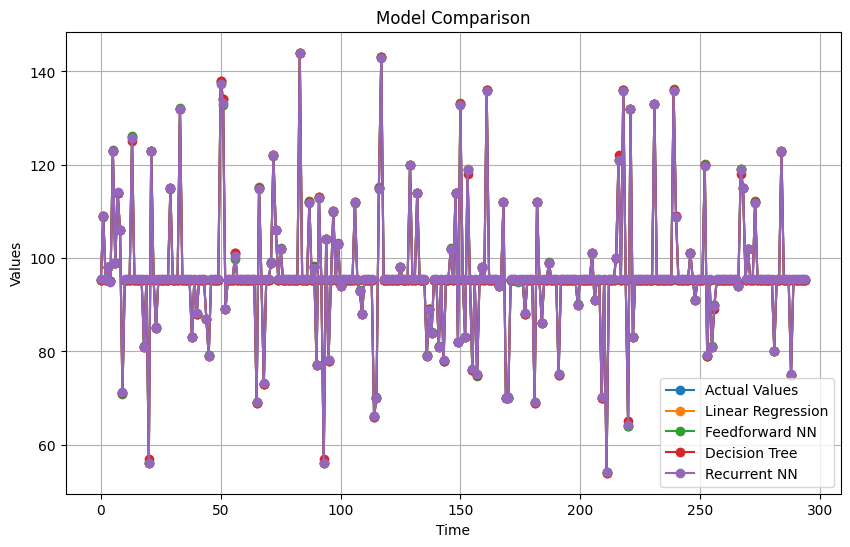

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor



# Load the first dataset
df1 = pd.read_csv('clean data.csv')

# Load the second dataset
df2 = pd.read_csv('dataset1.csv')

# Combine the datasets (replace 'your_target_column_name' with the actual target column name)
combined_df = pd.concat([df1, df2], ignore_index=True)

# Assuming 'pm10', 'pm25', and 'so2' are relevant columns
X = combined_df[['pm10', 'pm25', 'so2']]

# Choose the correct column name for the target variable (replace with your actual target column name)
y_column_name = 'pm25'
y = combined_df[y_column_name]

# Impute missing values in X using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Impute missing values in y using the mean strategy
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Feedforward Neural Network
feedforward_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
feedforward_model.fit(X_train, y_train)

# Decision Tree Model
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Recurrent Neural Network
X_train_rnn = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train.shape[1])))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=0)

# Make Predictions
linear_predictions = linear_model.predict(X_test)
feedforward_predictions = feedforward_model.predict(X_test)
decisiontree_predictions = regressor.predict(X_test)
rnn_predictions = rnn_model.predict(X_test_rnn).flatten()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', marker='o')
plt.plot(linear_predictions, label='Linear Regression', marker='o')
plt.plot(feedforward_predictions, label='Feedforward NN', marker='o')
plt.plot(decisiontree_predictions, label='Decision Tree regressor', marker='o')
plt.plot(rnn_predictions, label='Recurrent NN', marker='o')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Model Comparison')
plt.legend()
plt.grid(True)
plt.show()
